**D4-PPDM**

Putu Steven Belva Chan 			    (2208561011)

Kadek Bakti Pramanayoga St 		    (2208561043)

Celia Maureen Chandra 			    (2208561080)

I Gusti Bagus Sutha Arianata Putra 	(2208561141)

In [9]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [10]:
Ravdess = "./Ravdess/Audio_Speech_Actors_01-24/"
Crema = "./Crema/AudioWAV/"
Tess = "./Tess/"
Savee = "./Savee/"

**RAVDESSS**

In [11]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + i + '/' + f)

In [12]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
1  neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
2  neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
3  neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
4  neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
______________________________________________
      Emotions                                               Path
1435  surprise  ./Ravdess/Audio_Speech_Actors_01-24/Actor_24/0...
1436  surprise  ./Ravdess/Audio_Speech_Actors_01-24/Actor_24/0...
1437  surprise  ./Ravdess/Audio_Speech_Actors_01-24/Actor_24/0...
1438  surprise  ./Ravdess/Audio_Speech_Actors_01-24/Actor_24/0...
1439  surprise  ./Ravdess/Audio_Speech_Actors_01-24/Actor_24/0...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

**CREMA**

In [13]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


**TESS**

In [14]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64


**SAVEE**

In [15]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


In [29]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
1,neutral,./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
2,neutral,./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
3,neutral,./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
4,neutral,./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...


In [56]:
print(data_path)
print(data_path.Emotions.value_counts())

     Emotions                                               Path
0     neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
1     neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
2     neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
3     neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
4     neutral  ./Ravdess/Audio_Speech_Actors_01-24/Actor_01/0...
..        ...                                                ...
475  surprise                                ./Savee/KL_su11.wav
476  surprise                                ./Savee/KL_su12.wav
477  surprise                                ./Savee/KL_su13.wav
478  surprise                                ./Savee/KL_su14.wav
479  surprise                                ./Savee/KL_su15.wav

[12162 rows x 2 columns]
Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: count, dtype: int64


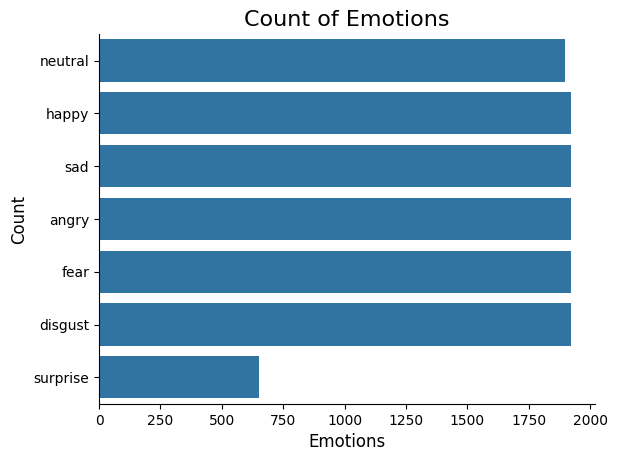

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

**DATA SPLITTING**

In [30]:
train_df, test_df = train_test_split(data_path, test_size=0.3, random_state=42, stratify=data_path['Emotions'])

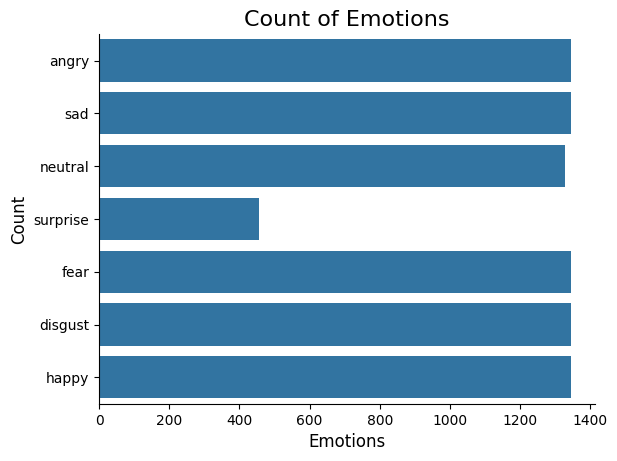

In [31]:
plt.title('Count of Emotions', size=16)
sns.countplot(train_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

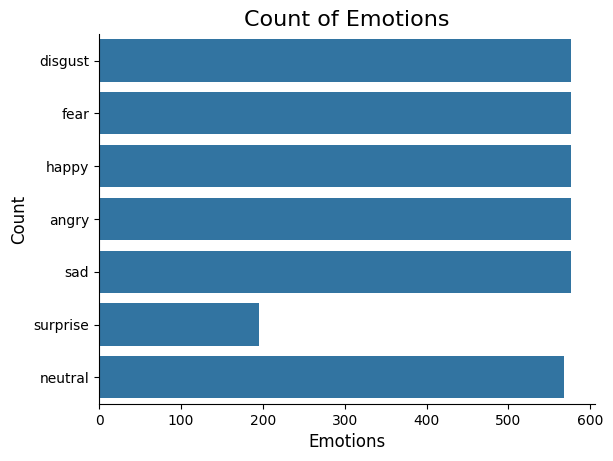

In [32]:
plt.title('Count of Emotions', size=16)
sns.countplot(test_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

**AUGMENTATION**

In [40]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

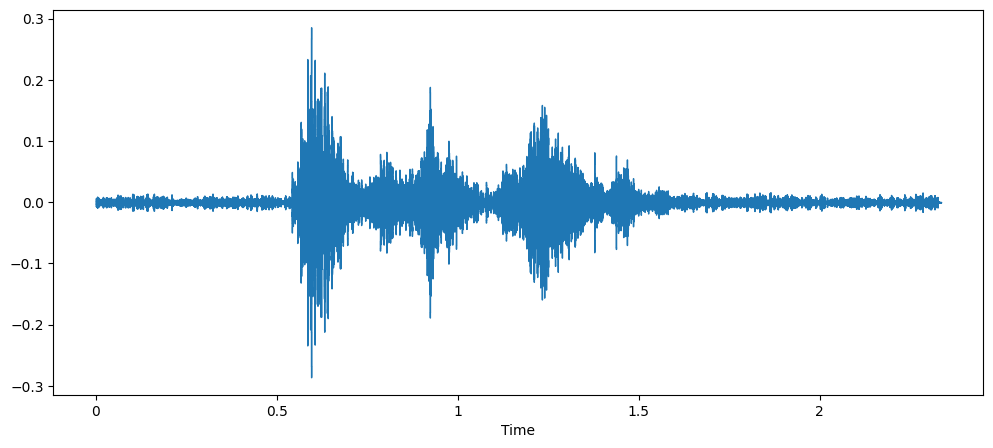

In [71]:
path = np.array(Crema_df.Path)[1]
data, sampling_rate = librosa.load(path)

# Normal audio
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sampling_rate)
ipd.Audio(data,rate=sampling_rate)

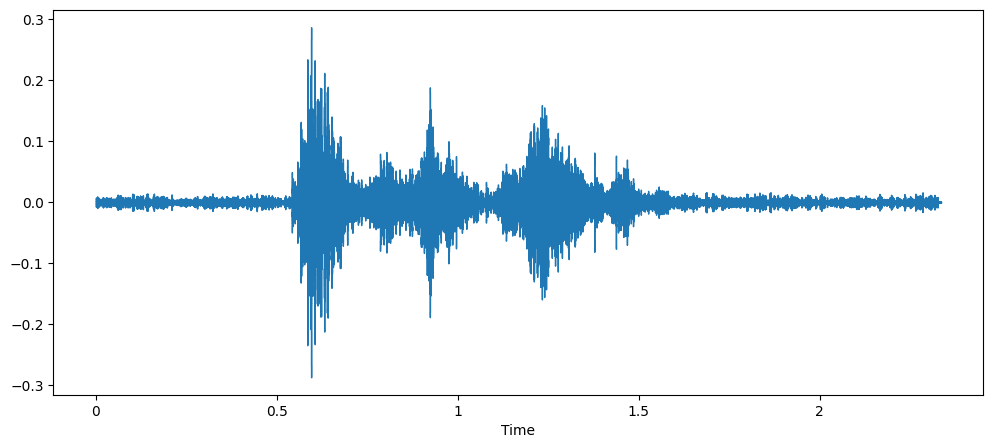

In [72]:
# Noise
data_noise = noise(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data_noise, sr=sampling_rate)
ipd.Audio(data_noise,rate=sampling_rate)

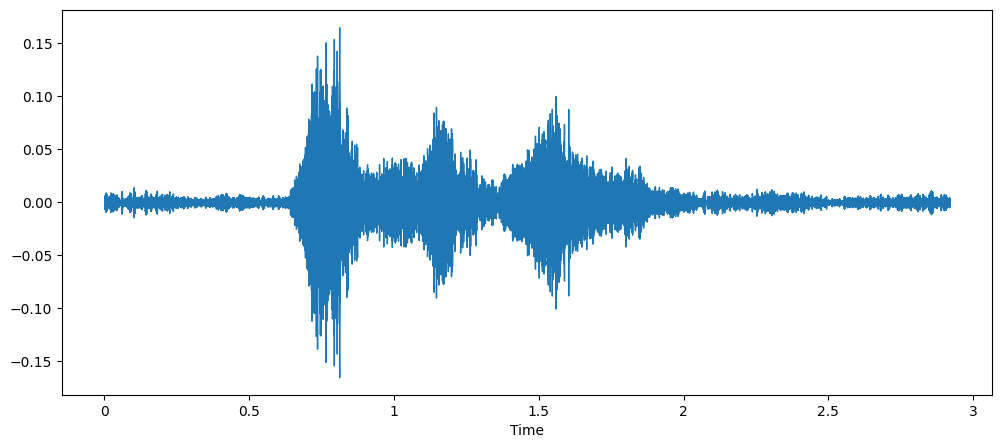

In [73]:
# Stretch
data_stretch = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data_stretch, sr=sampling_rate)
ipd.Audio(data_stretch,rate=sampling_rate)

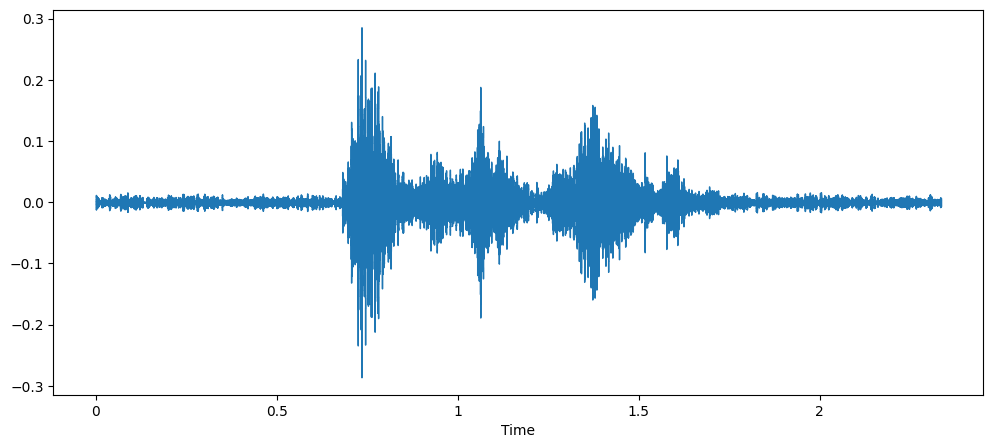

In [74]:
# Shift
data_shift = shift(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data_shift, sr=sampling_rate)
ipd.Audio(data_shift,rate=sampling_rate)

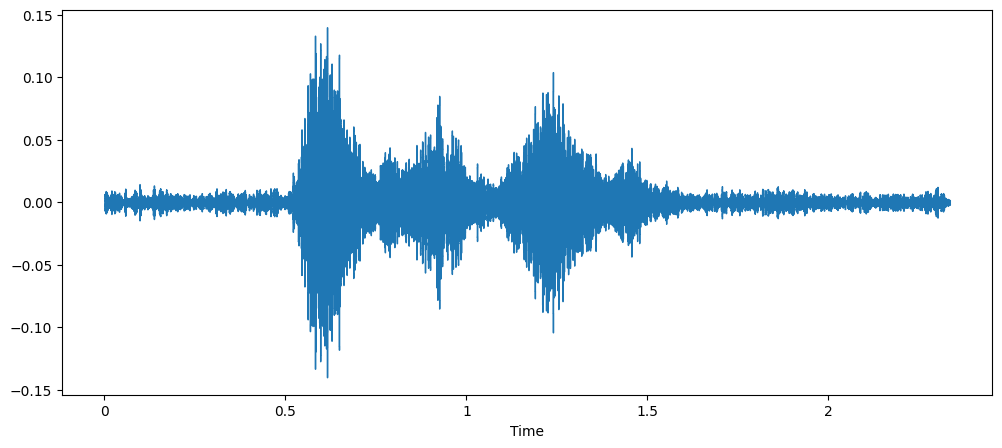

In [75]:
# Pitch
data_pitch = pitch(data, sampling_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data_pitch, sr=sampling_rate)
ipd.Audio(data_pitch,rate=sampling_rate)

In [41]:
# Mel Frequency Cepstral Coefficients (MFCC)
def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    mfcc=np.mean(librosa.feature.mfcc(y=data,sr=sr).T, axis=0)
    result=np.hstack((result,mfcc))
    return result

def get_features_train(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

def get_features_test(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    return audio

In [42]:
X_train, y_train = [], []
for path, emotion in zip(train_df.Path, train_df.Emotions):
    feature = get_features_train(path)
    for ele in feature:
        X_train.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        y_train.append(emotion)

In [43]:
trainFeatures = pd.DataFrame(X_train)
trainFeatures['labels'] = y_train
trainFeatures.to_csv('train_features.csv', index=False)
trainFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-224.968018,88.127022,-28.556711,42.041729,-26.456383,2.425796,-11.314594,6.590621,-17.847683,5.558612,...,-4.974501,-0.567333,-18.406267,0.743784,-14.731791,3.375727,-1.110938,6.291061,1.466656,angry
1,-136.773198,31.956022,-6.451932,9.706217,-8.906907,-9.483890,-1.076323,-2.119147,-8.502661,-0.313184,...,-3.612076,-4.814447,-10.381835,-4.142573,-6.554126,-0.717115,2.655032,2.748287,2.174956,angry
2,-248.623230,81.649124,-30.429928,40.234570,-31.664913,1.797544,-10.668080,5.378362,-18.987909,9.986733,...,-2.077498,-8.139628,-17.467079,-1.917704,-13.126306,7.943971,-0.954535,8.997632,-3.221879,angry
3,-100.947824,12.799493,-4.975743,3.333458,-6.885051,-8.063052,1.238954,-2.811634,-4.860511,-0.631905,...,-3.053434,-5.006016,-7.159232,-4.560851,-3.334749,0.883521,3.125114,2.915285,0.983916,angry
4,-512.800476,67.036659,16.652534,14.732719,1.504934,3.908049,-0.935905,-0.582631,-9.197448,-4.361269,...,-5.011508,-0.741592,-3.763394,-0.052377,-0.403557,-4.546918,-2.480759,-2.854675,-2.769855,angry


In [44]:
X_test, y_test = [], []
for path, emotion in zip(test_df.Path, test_df.Emotions):
    feature = get_features_test(path)
    X_test.append(feature)
    y_test.append(emotion)

In [45]:
testFeatures = pd.DataFrame(X_test)
testFeatures['labels'] = y_test
testFeatures.to_csv('test_features.csv', index=False)
testFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-409.781708,138.898575,16.619120,62.106537,-17.951117,20.537199,-10.197814,7.864418,-18.024940,0.866107,...,-5.015299,2.547534,-9.577332,6.215036,-11.494952,5.029482,-9.257662,-0.076080,-3.420002,disgust
1,-233.677643,8.696068,-31.825783,24.878464,-12.394256,9.717953,2.869047,-1.489102,-5.796555,5.779031,...,-2.419949,3.457555,3.048745,-2.770976,2.774320,7.404535,20.457363,4.896526,10.671601,fear
2,-410.981934,151.671387,5.876148,43.884144,-23.448103,24.610785,-14.701571,8.819416,-12.981906,1.977745,...,-1.154785,0.508979,-7.687923,4.037377,-12.825150,3.821622,-6.810735,5.192341,-3.801493,happy
3,-574.189026,69.399467,-16.230627,24.212524,3.046218,-8.011155,-1.873429,-11.898146,-2.485888,-3.896015,...,-7.381905,-3.164908,-1.465565,-2.655161,-5.886915,-5.339420,0.675956,-3.710739,0.588331,happy
4,-356.280884,68.444229,0.273231,-4.796208,-29.325169,7.266706,-1.323918,-15.098816,-5.528758,-3.504280,...,7.690853,-16.099146,6.859893,-0.259191,-7.920983,-2.280723,-2.810234,-8.536092,-2.973209,angry
